In [1]:
#Import code from last time
%run I2-4.ipynb

         Current function value: 0.817864
         Iterations: 100
         Function evaluations: 110
         Gradient evaluations: 110


<Figure size 640x480 with 1 Axes>

         Current function value: 0.725108
         Iterations: 100
         Function evaluations: 112
         Gradient evaluations: 112


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.75352113, 0.54225352],
       [0.54225352, 0.26056338],
       [0.26056338, 0.3943662 ],
       [0.3943662 , 0.62676056],
       [0.62676056, 0.79577465],
       [0.79577465, 0.70422535],
       [0.70422535, 0.53521127],
       [0.53521127, 0.40140845],
       [0.40140845, 0.12676056],
       [0.12676056, 0.33098592],
       [0.33098592, 0.41549296],
       [0.41549296, 0.55633803],
       [0.55633803, 0.5915493 ]])

In [3]:
testY

array([[0.26056338],
       [0.3943662 ],
       [0.62676056],
       [0.79577465],
       [0.70422535],
       [0.53521127],
       [0.40140845],
       [0.12676056],
       [0.33098592],
       [0.41549296],
       [0.55633803],
       [0.5915493 ],
       [0.51408451]])

In [4]:
trainX

array([[0.14788732, 0.06338028],
       [0.06338028, 0.43661972],
       [0.43661972, 0.57042253],
       [0.57042253, 0.66901409],
       [0.66901409, 0.6971831 ],
       [0.6971831 , 0.97183099],
       [0.97183099, 0.5915493 ],
       [0.5915493 , 0.28169014],
       [0.28169014, 0.26056338],
       [0.26056338, 0.46478873],
       [0.46478873, 0.99295775],
       [0.99295775, 0.67605634],
       [0.67605634, 0.25352113],
       [0.25352113, 0.45070423],
       [0.45070423, 0.        ],
       [0.        , 0.48591549],
       [0.48591549, 0.78169014],
       [0.78169014, 0.8028169 ],
       [0.8028169 , 0.3028169 ],
       [0.3028169 , 0.47183099],
       [0.47183099, 0.41549296],
       [0.41549296, 0.64788732],
       [0.64788732, 0.61267606],
       [0.61267606, 1.        ],
       [1.        , 0.47887324],
       [0.47887324, 0.3028169 ],
       [0.3028169 , 0.38028169],
       [0.38028169, 0.5915493 ],
       [0.5915493 , 0.8028169 ],
       [0.8028169 , 0.47183099],
       [0.

In [5]:
trainY

array([[0.43661972],
       [0.57042253],
       [0.66901409],
       [0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.54225352]])

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 4
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

5.583214909822339e-11

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.017097
         Iterations: 62
         Function evaluations: 70
         Gradient evaluations: 70


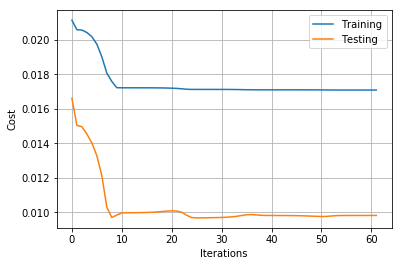

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.02115105]),
 array([0.02059868]),
 array([0.02058054]),
 array([0.02043871]),
 array([0.02019378]),
 array([0.01975831]),
 array([0.01902237]),
 array([0.01807473]),
 array([0.01759464]),
 array([0.01723283]),
 array([0.01722785]),
 array([0.0172278]),
 array([0.0172277]),
 array([0.01722752]),
 array([0.01722716]),
 array([0.0172265]),
 array([0.01722527]),
 array([0.01722309]),
 array([0.01721946]),
 array([0.01721387]),
 array([0.01720572]),
 array([0.01719224]),
 array([0.01717037]),
 array([0.01714182]),
 array([0.0171344]),
 array([0.01713364]),
 array([0.01713348]),
 array([0.01713339]),
 array([0.01713322]),
 array([0.01713291]),
 array([0.01713233]),
 array([0.01713126]),
 array([0.01712936]),
 array([0.01712612]),
 array([0.01712121]),
 array([0.01711631]),
 array([0.01711225]),
 array([0.01710981]),
 array([0.01710934]),
 array([0.01710931]),
 array([0.01710931]),
 array([0.01710929]),
 array([0.01710927]),
 array([0.01710923]),
 array([0.01710914]),
 array([0.0171

In [17]:
T.testJ

[array([0.01661617]),
 array([0.01504684]),
 array([0.01496702]),
 array([0.01454209]),
 array([0.01402198]),
 array([0.01328329]),
 array([0.01211697]),
 array([0.01028954]),
 array([0.00969202]),
 array([0.00983882]),
 array([0.00996425]),
 array([0.00996741]),
 array([0.00997058]),
 array([0.00997448]),
 array([0.00997979]),
 array([0.0099874]),
 array([0.00999858]),
 array([0.01001502]),
 array([0.01003821]),
 array([0.01006608]),
 array([0.01008136]),
 array([0.01006672]),
 array([0.01000011]),
 array([0.0098244]),
 array([0.00968972]),
 array([0.00966983]),
 array([0.00967302]),
 array([0.00967723]),
 array([0.0096822]),
 array([0.00968839]),
 array([0.00969698]),
 array([0.0097098]),
 array([0.00972981]),
 array([0.00976161]),
 array([0.00981074]),
 array([0.00985233]),
 array([0.00986354]),
 array([0.00984461]),
 array([0.00981975]),
 array([0.00981237]),
 array([0.00981129]),
 array([0.00981025]),
 array([0.00980899]),
 array([0.00980725]),
 array([0.00980469]),
 array([0.0098

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.00716110516655057

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.45904386],
       [0.64364719],
       [0.56783424],
       [0.55980296],
       [0.53500839],
       [0.63443041],
       [0.3772013 ],
       [0.38711287],
       [0.4935773 ],
       [0.58808134],
       [0.70690406],
       [0.40371753],
       [0.34783128],
       [0.58490309],
       [0.32848562],
       [0.67919068],
       [0.63329468],
       [0.53774247],
       [0.3256391 ],
       [0.57580368],
       [0.48819921],
       [0.60641553],
       [0.50659421],
       [0.66961997],
       [0.32631176],
       [0.43683535],
       [0.53736657],
       [0.59652208],
       [0.60619935],
       [0.38874906],
       [0.42456148],
       [0.5624103 ],
       [0.47262255],
       [0.56226904],
       [0.65448548],
       [0.50317575],
       [0.39203929],
       [0.52002038],
       [0.48132843],
       [0.54168226],
       [0.62201452],
       [0.43183042],
       [0.41490345],
       [0.46295395],
       [0.6310997 ],
       [0.51184713],
       [0.61590845],
       [0.435

In [21]:
y

array([[0.43661972],
       [0.57042253],
       [0.66901409],
       [0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.54225352],
       [0.260

In [22]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.032329608198056414

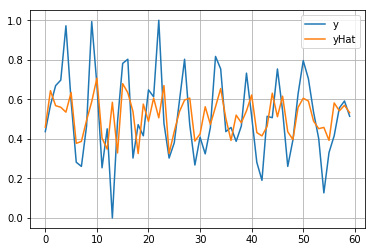

In [23]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [24]:
prediksi=NN.forward(dataprediksi)

In [25]:
prediksi

array([[0.48527017],
       [0.45981458],
       [0.50217394],
       [0.50450134]])

In [26]:
from sklearn.metrics import mean_squared_error 

In [27]:
Y_true= ([	0.387323944	]	,
[	0.373239437	]	,
[	0.366197183	]	,
[	0.443661972	]	,
)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.009819956476943847

In [28]:
dataprediksi

array([[0.5915493 , 0.51408451],
       [0.51408451, 0.38732394],
       [0.38732394, 0.37323944],
       [0.37323944, 0.36619718]])

In [29]:
a=np.array([	0.366197183	,	0.443661972	])

In [30]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.54060565])

In [31]:
#prediksi 2
c=prediksi
b=a[1:]
d=np.concatenate((b,c))
prediksi=NN.forward(d)
prediksi

array([0.55278714])

In [32]:
#prediksi 3
c=prediksi
b=d[1:]
e=np.concatenate((b,c))
prediksi=NN.forward(e)
prediksi

array([0.52154088])

In [33]:
#prediksi 4
c=prediksi
b=e[1:]
f=np.concatenate((b,c))
prediksi=NN.forward(f)
prediksi

array([0.50335588])

In [34]:
#prediksi 5
c=prediksi
b=f[1:]
g=np.concatenate((b,c))
prediksi=NN.forward(g)
prediksi

array([0.50740016])

In [35]:
#prediksi 6
c=prediksi
b=g[1:]
h=np.concatenate((b,c))
prediksi=NN.forward(h)
prediksi

array([0.51609285])